<div align="center">
 <img src="https://raw.githubusercontent.com/matheusmota/dataviz2018/master/resources/images/logo_facens_pos.png" width="100x">
    <h3>Aplicações de Aprendizado de Máquina e Processamento de Linguagem Natural</h3>  
    <h1><center>Segmentação de clientes em shopping</center></h1>
</div>


* **203066**  - Evandro Bertolucci
* **110257**  - João Victor Carvalho
* **203071**  - Louise Constantino
* **203087**  - Luiza Constantino
* **203019**  - Murilo Piva
* **203263**  - Rafael Henrique

Problema proposto no kaggle: https://www.kaggle.com/akram24/mall-customers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy.spatial import ConvexHull
import numpy as np
from matplotlib.patches import Ellipse

### 1. Carregando os dados

Buscando os dados onlin,e diretamente de um repo github.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

Primeira olhada nos dados

In [3]:
display(df.shape)
df.head()

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Verificando Dados Nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 2. Visualizando possíveis agrupamentos

Visualizando pares de atributos dois a dois.

<ipython-input-5-b4f170e72236>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


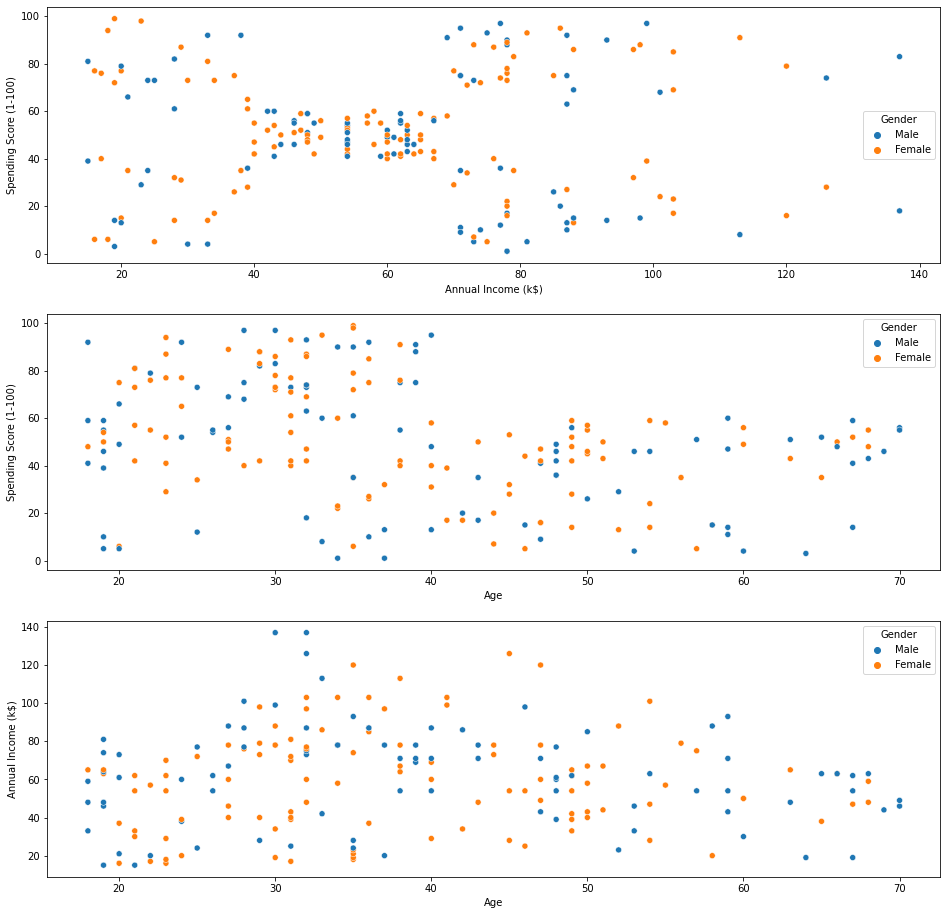

In [5]:
fig, ax =plt.subplots(3,1,figsize = (16,16))


sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", ax=ax[0])
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender", ax=ax[1])
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender", ax=ax[2])
fig.show()


In [6]:
# Checa a correlação entre cada um dos atributos (são todos numéricos)
def check_correlation(df): 
    fig, ax = plt.subplots(figsize=(20,8))
    sns.heatmap(
        df.corr(), 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot = True
    ).set_title('Correlação')
    
    return 

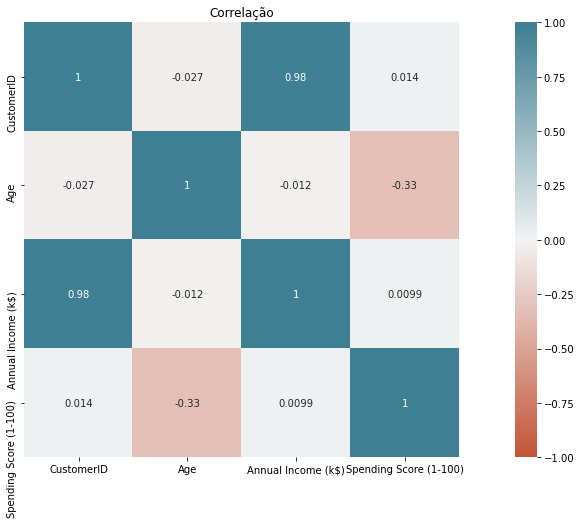

In [7]:
check_correlation(df)

### 3. Análise de clusters

Importando as classes dos algoritmos de agrupamento.

In [8]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
import random
import seaborn as sns

Executando analises com o K-Means

In [9]:
def Plot_kmeans(x,y,qtd_cluster):
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(qtd_cluster)]
    
    df_subset = df[[x, y]].copy()
    kmeans = KMeans(n_clusters=qtd_cluster, random_state=0).fit(df_subset)
    df_subset["Cluster"] = kmeans.labels_

    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df_subset[x], df_subset[y], c=df_subset['Cluster'], alpha = 100, s=15)
    # plot centers
    plt.scatter(cen_x, cen_y, marker='^', s=100)
    # draw enclosure
    plt.xlabel(x)
    plt.ylabel(y)

    qtd_total = df_subset.count()[0]
    comp_handler = []
    
    for i in df_subset.Cluster.unique():
        qtd_cluster = df_subset[df_subset["Cluster"]==i]["Cluster"].count()
        porc_cluster = round(qtd_cluster*100/qtd_total,2)
        label_legend = "".join(str(i) + ' - ' + str(qtd_cluster) + ' - ' + str(porc_cluster) + "%")
        comp_handler.append(mpatches.Patch(color = colors[i], label = label_legend))
        
        points = df_subset[df_subset.Cluster == i][[x, y]].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, color=colors[i])

    plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster - QTD - %', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1.0,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

    return df_subset

In [10]:
def Plot_kmeans_idade(x,y,idade,qtd_cluster):
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(qtd_cluster)]
    df_idade = df[df['Age'] < idade]
    df_subset = df_idade[[x, y]].copy()
    kmeans = KMeans(n_clusters=qtd_cluster, random_state=0).fit(df_subset)
    df_subset["Cluster"] = kmeans.labels_

    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df_subset[x], df_subset[y], c=df_subset['Cluster'], alpha = 100, s=15)
    # plot centers
    plt.scatter(cen_x, cen_y, marker='^', s=100)
    # draw enclosure
    plt.xlabel(x)
    plt.ylabel(y)

    qtd_total = df_subset.count()[0]
    comp_handler = []
    
    for i in df_subset.Cluster.unique():
        qtd_cluster = df_subset[df_subset["Cluster"]==i]["Cluster"].count()
        porc_cluster = round(qtd_cluster*100/qtd_total,2)
        label_legend = "".join(str(i) + ' - ' + str(qtd_cluster) + ' - ' + str(porc_cluster) + "%")
        comp_handler.append(mpatches.Patch(color = colors[i], label = label_legend))
        
        points = df_subset[df_subset.Cluster == i][[x, y]].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, color=colors[i])

    plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster - QTD - %', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1.0,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

    return df_subset

### Spending Score por Age

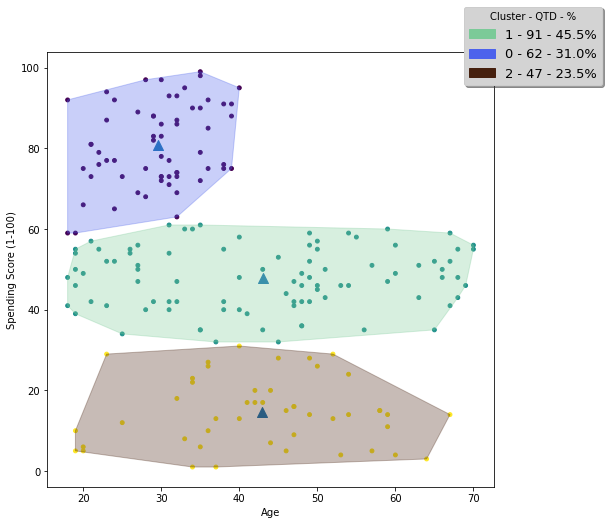

In [11]:
df_s = Plot_kmeans('Age', 'Spending Score (1-100)',3)

#### Avaliando a média de Age e Spending Score de cada Cluster

In [12]:
df_s[['Cluster','Age','Spending Score (1-100)']].groupby(by=['Cluster']).mean()

,Age,Spending Score (1-100)
Cluster,,
0,29.564516,80.741935
1,43.054945,47.780220
2,42.957447,14.595745


#### Avaliando a distribuição numérica das idades por Cluster

In [13]:
df_s[['Cluster','Age']].groupby(by='Cluster').std()

,Age
Cluster,
0,5.883071
1,15.672596
2,12.217161


___

### Annual Income por Age

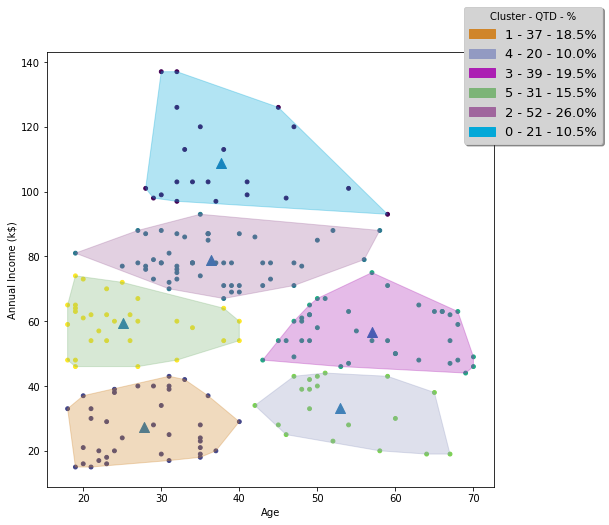

In [14]:
df_a = Plot_kmeans('Age', 'Annual Income (k$)',6)

#### Avaliando a média de Age e Annual Income de cada Cluster

In [15]:
df_a[['Cluster','Age','Annual Income (k$)']].groupby(by='Cluster').std()

,Age,Annual Income (k$)
Cluster,,
0,8.410311,13.560622
1,6.203264,9.147359
2,7.934403,6.367426
3,8.585444,7.752323
4,7.025517,8.683166
5,6.947112,7.684924


____

### Annual Income por Spending Score

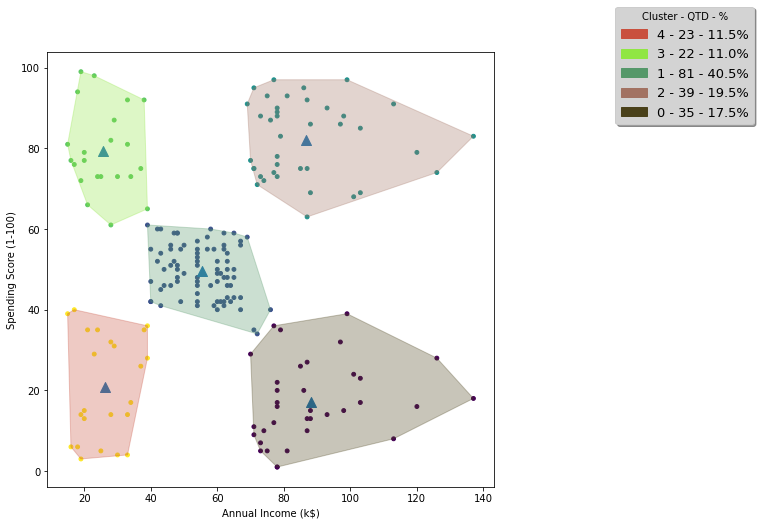

In [16]:
df_as = Plot_kmeans('Annual Income (k$)', 'Spending Score (1-100)',5)

#### Avaliando o modelo com a faixa etária menor que 45 anos

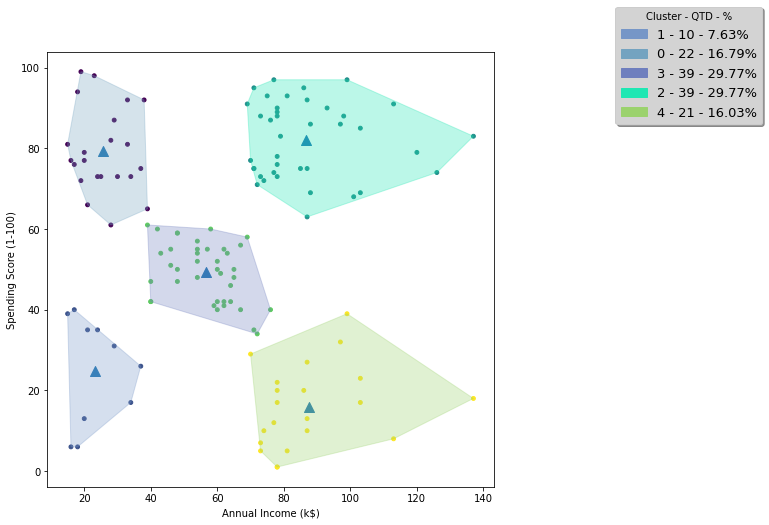

In [17]:
df_age = Plot_kmeans_idade('Annual Income (k$)', 'Spending Score (1-100)',45,5)

#### Verificando a média de Annual Income e Spending Score de cada Cluster

In [18]:
df_as[['Cluster','Annual Income (k$)', 'Spending Score (1-100)']].groupby(by='Cluster').mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


___

#### Executando analises com o GMM

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

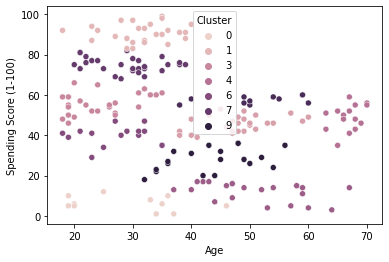

In [19]:
df_subset = df[["Age", "Spending Score (1-100)"]].copy()

gm = GaussianMixture(n_components=10, random_state=0).fit(df_subset)
df_subset["Cluster"] =  gm.predict(df_subset)

sns.scatterplot(data=df_subset, x="Age", y="Spending Score (1-100)", hue="Cluster")

### 4. Resultados

<div>
    <h3><i>Segmentações</i></h3>  
    <br>
    <br>
    <li><b>[18 - 40] - Faixa etária dos clientes que mais gastam</b></li>
    <br>
    <b>Análise:</b> <i> Spending Score por Age </i> = Podemos ver claramente, que pessoas mais jovens, em torno de 18 a 40 anos, concentram os cliente que mais gastam.   
</div>

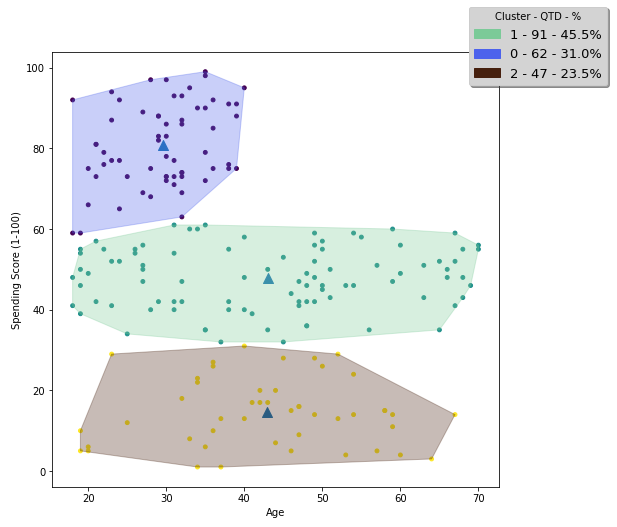

A partir dos cálculos do desvio padrão entre as idades dos clusters da imagem acima, percebemos que no cluster 0 a diferença entre as idades é menor do que nos outros clusters,ou seja, seria mais fácil atingir determinado público por idade quando a dispersão entre elas é menor.

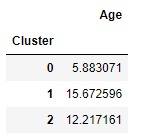

___

<div>     
    <li><b>[30 - 50] - Faixa etária dos clientes que recebem mais</b></li>    
    <li><b>[&lt;30 e &gt;50] - Faixa etária dos clientes que recebem menos</b></li>
    <br>
    <b>Análise:</b> <i>Annual Income por Age</i> = Por essa segmentação, podemos observar que a média de idade dos clientes de maior renda, está em torno dos 30 anos. As faixas etárias abaixo de 30 e acima de 50, concentram os clientes de menor renda.         
</div>

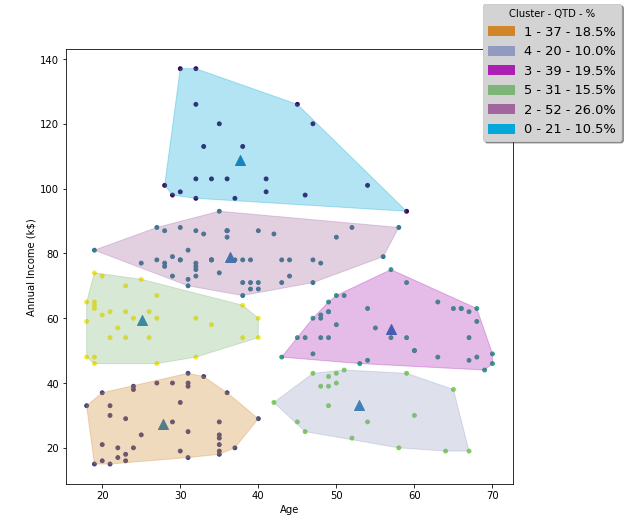

___

<div>          
    <li><b>[&lt; 30 e renda abaixo da média] e [30 - 40 e renda acima da média] - Faixa etária e renda anual dos Clientes que gastam mais</b></li>      
    <br>
    <b>Análise:</b> <i>Annual Income por Spending Score</i> =  Analisando a renda anual por pontuação de gasto, notamos que independente da renda anual, temos duas segmentações entre os que mais gastam.         
Como observamos anteriormente, o grupo com maior gasto está concentrado entre 18 e 40 anos, e entre esse grupo temos duas segmentações de renda, menores de 30 anos que recebem menos e maiores de 30 que recebem mais. Ou seja, a faixa etária tem maior influência no consumo.      

</div>

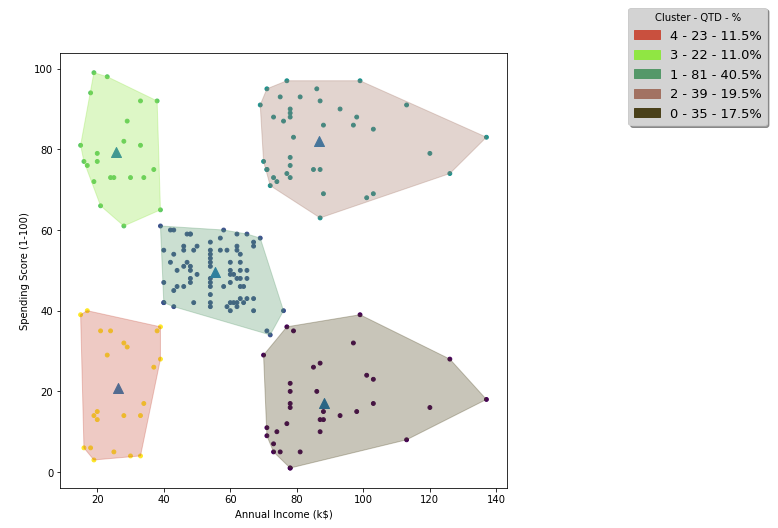